Descriptive Statistics:
                    Observation Date  Interest Rates  Personal Income  \
count                            799      799.000000       799.000000   
mean   1992-03-31 23:43:46.783479296        5.756771      7517.214518   
min              1959-01-01 00:00:00        0.620000       391.800000   
25%              1975-08-16 12:00:00        3.880000      1393.600000   
50%              1992-04-01 00:00:00        5.210000      5357.400000   
75%              2008-11-16 00:00:00        7.460000     12185.450000   
max              2025-07-01 00:00:00       15.320000     26200.200000   
std                              NaN        2.902971      6897.432968   

       Producer Price Index  Consumer Price Index  Industrial Production  \
count            799.000000            799.000000             799.000000   
mean             120.122121            140.486603              67.953518   
min               31.300000             28.970000              21.999800   
25%           

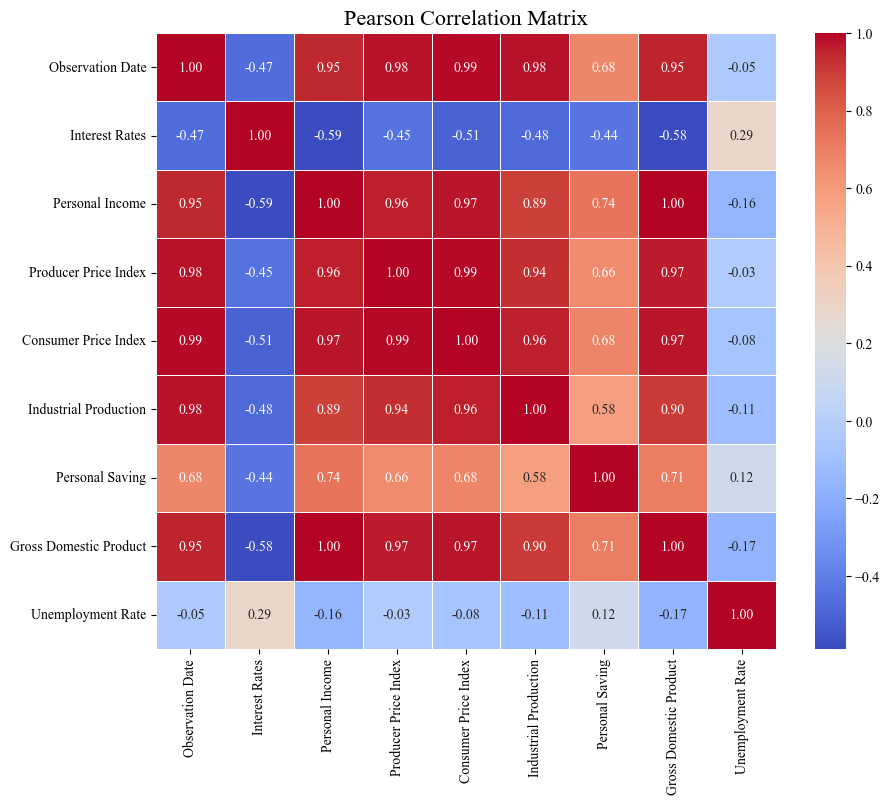

In [4]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Set global font to 'Times New Roman'
plt.rcParams['font.family'] = 'Times New Roman'

# Load the Excel file
file_path = 'Exogenus - Unemployment Rate.xlsx'
data = pd.read_excel(file_path)

# Descriptive Analysis
summary_statistics = data.describe()
print("Descriptive Statistics:")
print(summary_statistics)

# Pearson Correlation Analysis
correlation_matrix = data.corr(method='pearson')
print("\nPearson Correlation Matrix:")
print(correlation_matrix)

# Regression Analysis
# Define the independent variables and dependent variable
X = data[['Interest Rates', 'Personal Income', 'Producer Price Index', 'Consumer Price Index', 
          'Industrial Production', 'Personal Saving', 'Gross Domestic Product']]
y = data['Unemployment Rate']

# Add a constant to the independent variables matrix (for intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the regression summary
regression_summary = model.summary()

# Print regression results
print("\nRegression Summary:")
print(regression_summary)

# Create a heatmap of the Pearson correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True, linewidths=0.5)

# Set the title for the heatmap
plt.title('Pearson Correlation Matrix', fontsize=16)
plt.show()


C:\Users\nafem\AppData\Local\Temp\ipykernel_22332\1087309180.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


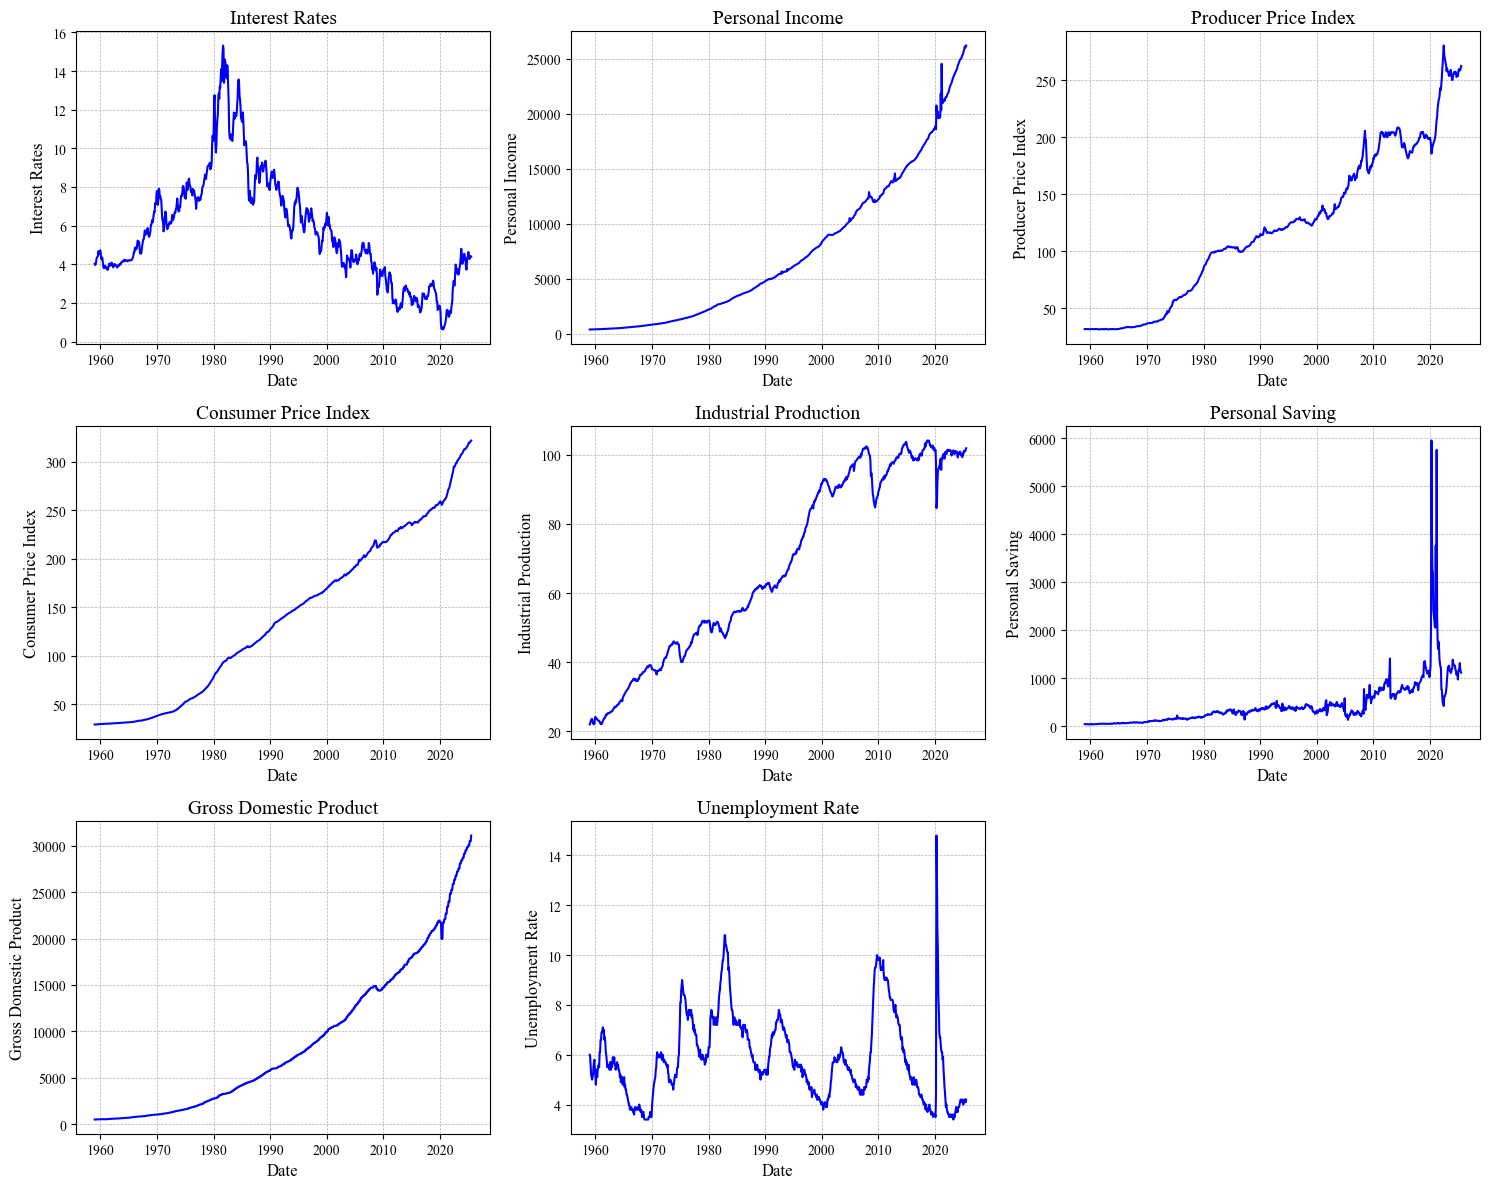

In [6]:
# Create a more professional plot with grids, straight text, and rotated labels for readability
plt.figure(figsize=(15, 12))
for i, variable in enumerate(variables, 1):
    plt.subplot(3, 3, i)
    plt.plot(data['Observation Date'], data[variable], label=variable, color='b')
    plt.title(variable, fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel(variable, fontsize=12)
    
    # Add gridlines for better readability
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    # Rotate x-axis labels to keep them straight
    plt.xticks(rotation=0, fontsize=10)
    plt.yticks(fontsize=10)
    
    plt.tight_layout()

# Show the updated plots
plt.show()


# Stochastic Properties and Pre-testing

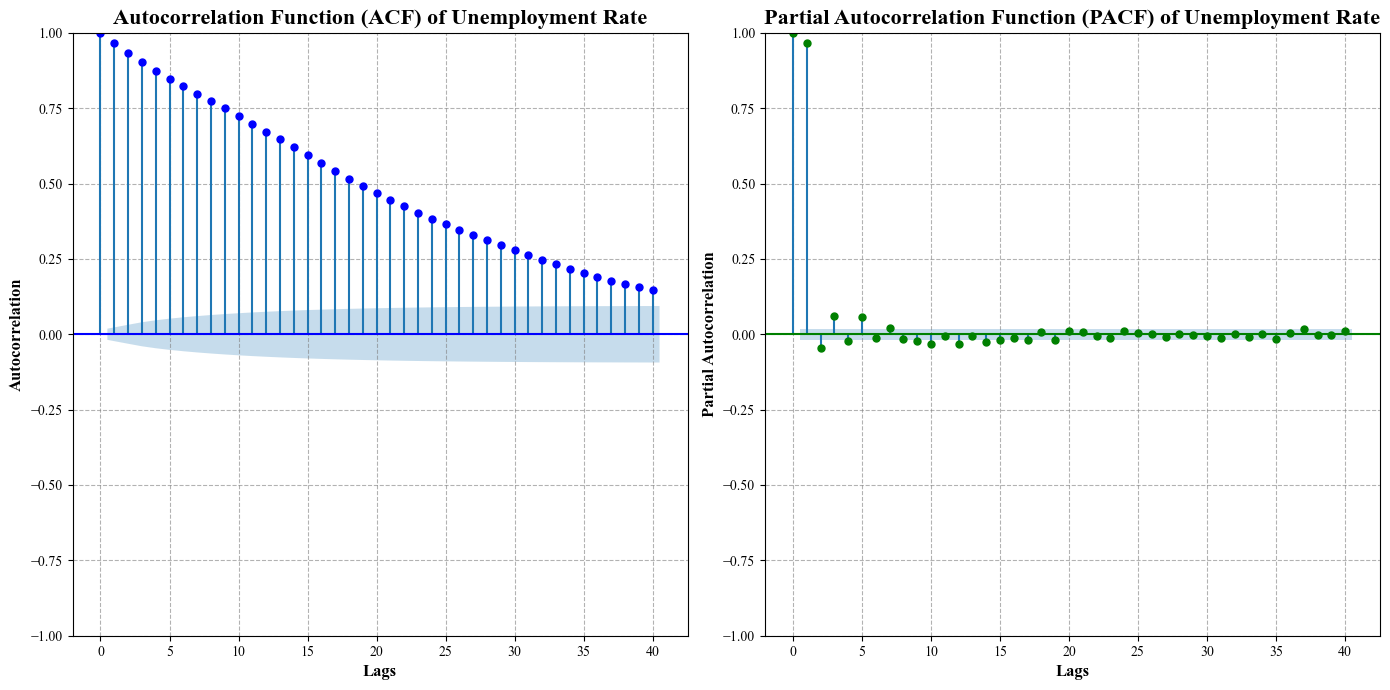

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import rcParams
import matplotlib.pyplot as plt

# Set global font to 'Times New Roman'
rcParams['font.family'] = 'Times New Roman'

# Assuming 'data' is already loaded and cleaned
# Plot ACF and PACF 
plt.figure(figsize=(14, 7))

# Plot ACF
plt.subplot(121)
plot_acf(data['Unemployment Rate'], lags=40, ax=plt.gca(), color='b', alpha=0.6)
plt.title('Autocorrelation Function (ACF) of Unemployment Rate', fontsize=16, fontweight='bold')
plt.xlabel('Lags', fontsize=12, fontweight='bold')
plt.ylabel('Autocorrelation', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', color='gray', alpha=0.6)

# Plot PACF
plt.subplot(122)
plot_pacf(data['Unemployment Rate'], lags=40, ax=plt.gca(), color='g', alpha=0.6)
plt.title('Partial Autocorrelation Function (PACF) of Unemployment Rate', fontsize=16, fontweight='bold')
plt.xlabel('Lags', fontsize=12, fontweight='bold')
plt.ylabel('Partial Autocorrelation', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', color='gray', alpha=0.6)

# Adjust layout for better readability
plt.tight_layout()

# Show the plots
plt.show()


In [10]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test on the 'Unemployment Rate' series
adf_result = adfuller(data['Unemployment Rate'])

# Extract the ADF results
adf_statistic = adf_result[0]
adf_p_value = adf_result[1]
adf_critical_values = adf_result[4]

# Display the ADF result 
print("Augmented Dickey-Fuller Test Results")
print("-" * 50)
print(f"ADF Statistic: {adf_statistic:.4f}")
print(f"P-value: {adf_p_value:.4f}")
print("\nCritical Values:")
for key, value in adf_critical_values.items():
    print(f"  {key}: {value:.4f}")
print("-" * 50)

# Interpret the result
if adf_p_value < 0.05:
    print("Conclusion: The series is likely stationary (reject the null hypothesis).")
else:
    print("Conclusion: The series is likely non-stationary (fail to reject the null hypothesis).")


Augmented Dickey-Fuller Test Results
--------------------------------------------------
ADF Statistic: -3.4201
P-value: 0.0103

Critical Values:
  1%: -3.4386
  5%: -2.8652
  10%: -2.5687
--------------------------------------------------
Conclusion: The series is likely stationary (reject the null hypothesis).


# Differencing to make the Data Stationary

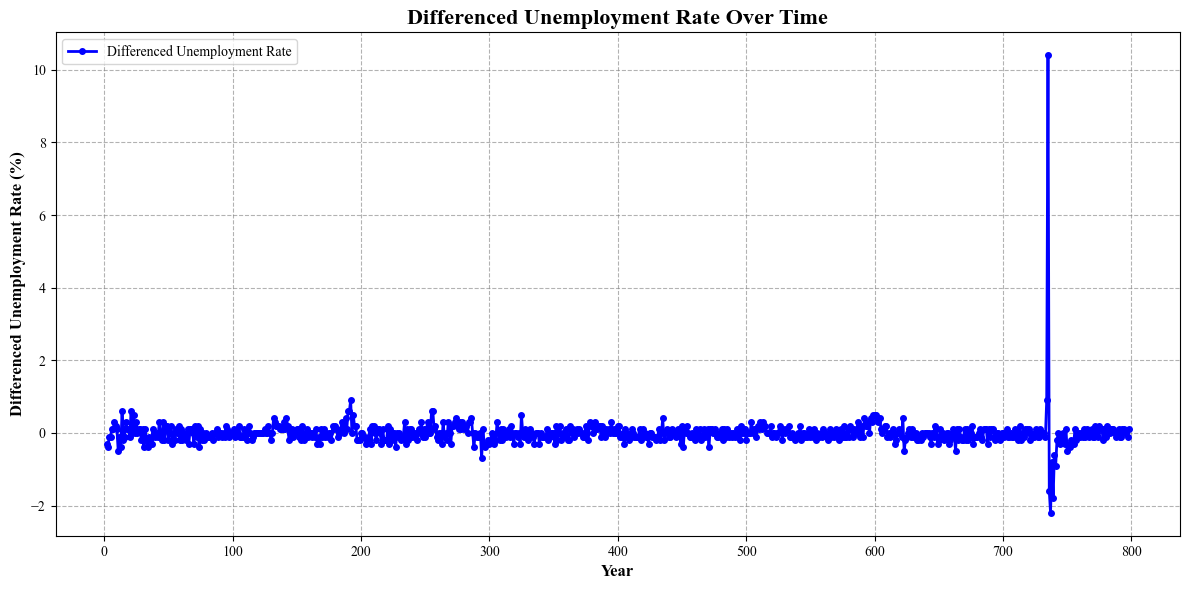

Augmented Dickey-Fuller Test Results for Differenced Data
--------------------------------------------------
ADF Statistic: -15.5196
P-value: 0.0000

Critical Values:
  1%: -3.4386
  5%: -2.8652
  10%: -2.5687
--------------------------------------------------
Conclusion: The differenced series is likely stationary (reject the null hypothesis).


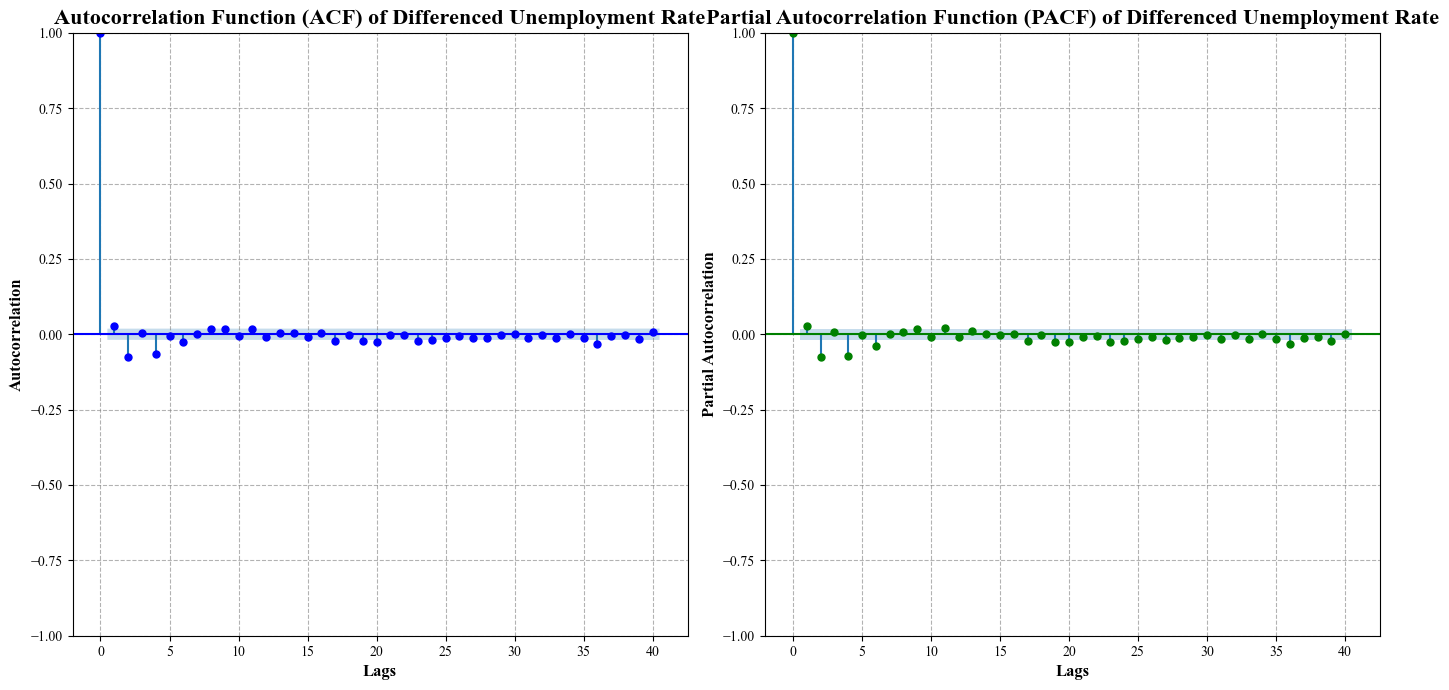

In [12]:
# Import necessary libraries
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import rcParams

# Set global font to 'Times New Roman'
rcParams['font.family'] = 'Times New Roman'

# Apply differencing to make the data stationary
data['Unemployment Rate Diff'] = data['Unemployment Rate'].diff()

# Drop the first row since it will be NaN due to the differencing
data.dropna(inplace=True)

# Plot the differenced series
plt.figure(figsize=(12, 6))

plt.plot(data.index, data['Unemployment Rate Diff'], label='Differenced Unemployment Rate', color='b', marker='o', markersize=4, linestyle='-', linewidth=2)
plt.title('Differenced Unemployment Rate Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Differenced Unemployment Rate (%)', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', color='gray', alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

# Re-run the Augmented Dickey-Fuller test to check if the differenced series is stationary
adf_result_diff = adfuller(data['Unemployment Rate Diff'])

# Extract the ADF results
adf_statistic_diff = adf_result_diff[0]
adf_p_value_diff = adf_result_diff[1]
adf_critical_values_diff = adf_result_diff[4]

# Display the ADF result for differenced data
print("Augmented Dickey-Fuller Test Results for Differenced Data")
print("-" * 50)
print(f"ADF Statistic: {adf_statistic_diff:.4f}")
print(f"P-value: {adf_p_value_diff:.4f}")
print("\nCritical Values:")
for key, value in adf_critical_values_diff.items():
    print(f"  {key}: {value:.4f}")
print("-" * 50)

# Interpret the result
if adf_p_value_diff < 0.05:
    print("Conclusion: The differenced series is likely stationary (reject the null hypothesis).")
else:
    print("Conclusion: The differenced series is likely non-stationary (fail to reject the null hypothesis).")

# Plot ACF and PACF for differenced Unemployment Rate
plt.figure(figsize=(14, 7))

# Plot ACF
plt.subplot(121)
plot_acf(data['Unemployment Rate Diff'], lags=40, ax=plt.gca(), color='b', alpha=0.6)
plt.title('Autocorrelation Function (ACF) of Differenced Unemployment Rate', fontsize=16, fontweight='bold')
plt.xlabel('Lags', fontsize=12, fontweight='bold')
plt.ylabel('Autocorrelation', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', color='gray', alpha=0.6)

# Plot PACF
plt.subplot(122)
plot_pacf(data['Unemployment Rate Diff'], lags=40, ax=plt.gca(), color='g', alpha=0.6)
plt.title('Partial Autocorrelation Function (PACF) of Differenced Unemployment Rate', fontsize=16, fontweight='bold')
plt.xlabel('Lags', fontsize=12, fontweight='bold')
plt.ylabel('Partial Autocorrelation', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', color='gray', alpha=0.6)

plt.tight_layout()
plt.show()


In [14]:
import numpy as np
import pandas as pd

# Assuming 'data' is your original DataFrame
# Create a new DataFrame to store transformed data
transformed_data = pd.DataFrame()

# List of exogenous variables
exogenous_variables = ['Interest Rates', 'Personal Income', 'Producer Price Index', 'Consumer Price Index', 
                       'Industrial Production', 'Personal Saving', 'Gross Domestic Product']

# Apply log transformation to all exogenous variables
for var in exogenous_variables:
    transformed_data[var + '_log'] = np.log(data[var])

# Apply differencing to the log-transformed variables
for var in exogenous_variables:
    transformed_data[var + '_log_diff'] = transformed_data[var + '_log'].diff()

# Apply differencing to the original 'Unemployment Rate' (no log transformation)
transformed_data['Unemployment Rate Diff'] = data['Unemployment Rate'].diff()

# Drop the NaN values created by differencing (first row will be NaN for each differenced series)
transformed_data.dropna(inplace=True)

# Display the first few rows of the new DataFrame with transformed and differenced data
print(transformed_data.head())

# Optionally, you can save this new DataFrame to a new Excel file if needed
# transformed_data.to_excel('transformed_data.xlsx', index=False)


   Interest Rates_log  Personal Income_log  Producer Price Index_log  \
3            1.415853             5.991215                  3.459466   
4            1.460938             5.997447                  3.459466   
5            1.467874             6.003393                  3.456317   
6            1.481605             6.004874                  3.456317   
7            1.488400             6.000672                  3.453157   

   Consumer Price Index_log  Industrial Production_log  Personal Saving_log  \
3                  3.366606                   3.145806             3.688879   
4                  3.368674                   3.160759             3.640214   
5                  3.371082                   3.161903             3.642836   
6                  3.372455                   3.137666             3.655840   
7                  3.373484                   3.103200             3.546740   

   Gross Domestic Product_log  Interest Rates_log_diff  \
3                    6.258918     

C:\Users\nafem\AppData\Local\Temp\ipykernel_22332\2962070051.py:41: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


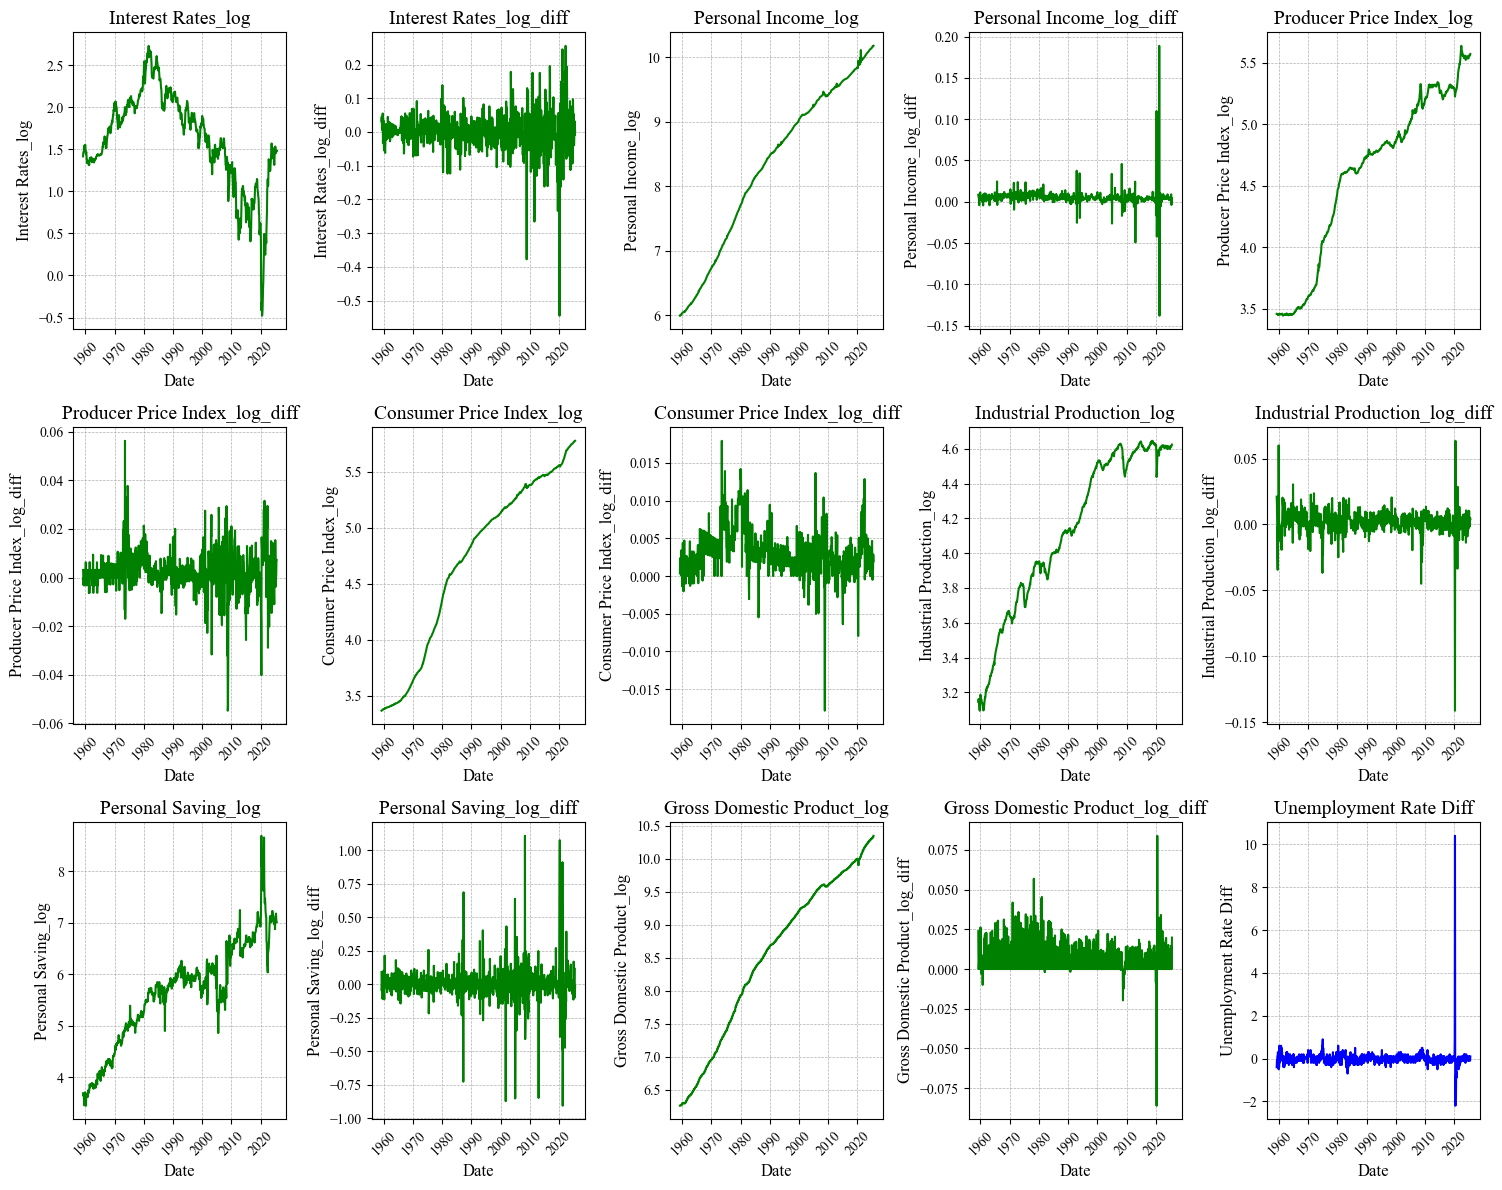

In [16]:
import matplotlib.pyplot as plt

# Remove the first row of 'Observation Date' to match the differenced data
observation_dates = data['Observation Date'].iloc[1:]

# Define the variables you want to plot from the transformed_data DataFrame
variables = [
    'Interest Rates_log', 'Interest Rates_log_diff',
    'Personal Income_log', 'Personal Income_log_diff',
    'Producer Price Index_log', 'Producer Price Index_log_diff',
    'Consumer Price Index_log', 'Consumer Price Index_log_diff',
    'Industrial Production_log', 'Industrial Production_log_diff',
    'Personal Saving_log', 'Personal Saving_log_diff',
    'Gross Domestic Product_log', 'Gross Domestic Product_log_diff',
    'Unemployment Rate Diff'
]

# Create a professional plot with grids, straight text, and rotated labels for readability
plt.figure(figsize=(15, 12))

# Loop through each variable and create a subplot for each
for i, variable in enumerate(variables, 1):
    plt.subplot(3, 5, i)  # 3 rows and 5 columns (adjust for the number of variables)
    
    if variable == 'Unemployment Rate Diff':
        plt.plot(observation_dates, transformed_data[variable], label=variable, color='b')
    else:
        plt.plot(observation_dates, transformed_data[variable], label=variable, color='g')
    
    plt.title(variable, fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel(variable, fontsize=12)
    
    # Add gridlines for better readability
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    # Rotate x-axis labels to keep them straight
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    
    plt.tight_layout()

# Show the updated plots
plt.show()

C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood

ARIMAX Model Summary:
                                 SARIMAX Results                                  
Dep. Variable:     Unemployment Rate Diff   No. Observations:                  636
Model:                     ARIMA(1, 0, 0)   Log Likelihood                 267.264
Date:                    Wed, 31 Dec 2025   AIC                           -514.529
Time:                            11:21:04   BIC                           -469.977
Sample:                                 0   HQIC                          -497.231
                                    - 636                                         
Covariance Type:                      opg                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.0359      0.010      3.575      0.000       0.016       0.056
Interest Rates

C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



SARIMAX Model Summary:
                                      SARIMAX Results                                       
Dep. Variable:               Unemployment Rate Diff   No. Observations:                  636
Model:             SARIMAX(1, 0, 0)x(1, 1, [1], 12)   Log Likelihood                 239.548
Date:                              Wed, 31 Dec 2025   AIC                           -457.095
Time:                                      11:21:25   BIC                           -408.298
Sample:                                           0   HQIC                          -438.133
                                              - 636                                         
Covariance Type:                                opg                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Interest Rates_log_diff         

C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


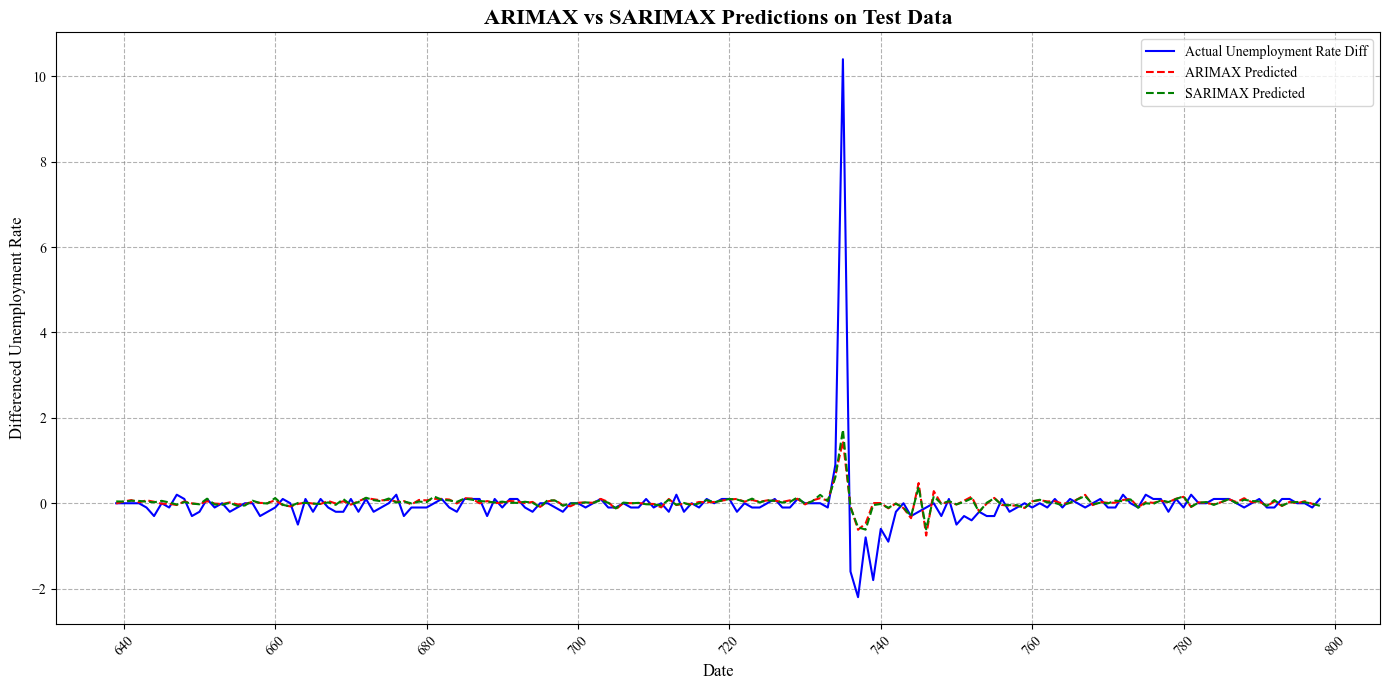

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from statsmodels.tools.eval_measures import aic, bic

# Assuming the transformed_data has been prepared as described earlier
# Define the dependent and exogenous variables
y = transformed_data['Unemployment Rate Diff']  # Dependent variable (differenced Unemployment Rate)

# Exogenous variables (log-transformed and differenced values)
X = transformed_data[['Interest Rates_log_diff', 'Personal Income_log_diff', 'Producer Price Index_log_diff',
                      'Consumer Price Index_log_diff', 'Industrial Production_log_diff', 'Personal Saving_log_diff',
                      'Gross Domestic Product_log_diff']]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# ---------------- ARIMAX Model ----------------
# Fit ARIMAX (ARIMA with exogenous variables) model
arimax_model = ARIMA(y_train, exog=X_train, order=(1, 0, 0))  # Using ARIMA(1, 0, 0) as a starting point
arimax_result = arimax_model.fit()

# ARIMAX Summary
print("ARIMAX Model Summary:")
print(arimax_result.summary())

# Make predictions on the test set
y_pred_arimax = arimax_result.predict(start=len(y_train), end=len(y_train)+len(y_test)-1, exog=X_test)

# Calculate AIC and BIC for ARIMAX
print(f"\nARIMAX AIC: {arimax_result.aic}")
print(f"ARIMAX BIC: {arimax_result.bic}")

# ---------------- SARIMAX Model ----------------
# Fit SARIMAX (Seasonal ARIMAX) model with seasonal order (1,1,1,12) as an example (seasonal periods = 12 for yearly seasonality)
sarimax_model = SARIMAX(y_train, exog=X_train, order=(1, 0, 0), seasonal_order=(1, 1, 1, 12))
sarimax_result = sarimax_model.fit()

# SARIMAX Summary
print("\nSARIMAX Model Summary:")
print(sarimax_result.summary())

# Make predictions on the test set
y_pred_sarimax = sarimax_result.predict(start=len(y_train), end=len(y_train)+len(y_test)-1, exog=X_test)

# Calculate AIC and BIC for SARIMAX
print(f"\nSARIMAX AIC: {sarimax_result.aic}")
print(f"SARIMAX BIC: {sarimax_result.bic}")

# ---------------- Plot the Results ----------------
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label="Actual Unemployment Rate Diff", color='blue')
plt.plot(y_test.index, y_pred_arimax, label="ARIMAX Predicted", color='red', linestyle='--')
plt.plot(y_test.index, y_pred_sarimax, label="SARIMAX Predicted", color='green', linestyle='--')
plt.title('ARIMAX vs SARIMAX Predictions on Test Data', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Differenced Unemployment Rate', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', color='gray', alpha=0.6)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

